In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [21]:
iris = load_iris()
X = iris.data
y = iris.target

In [23]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)  
    wcss.append(kmeans.inertia_)


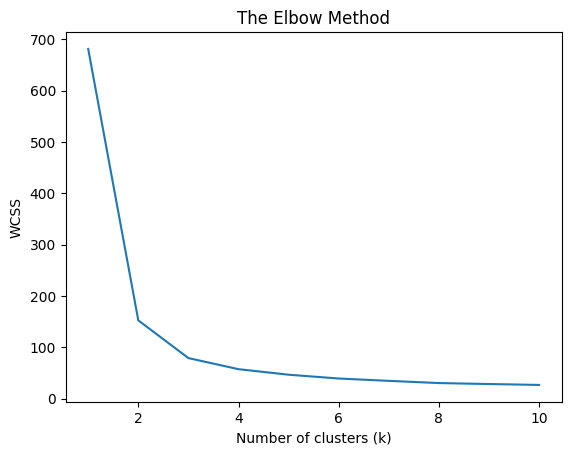

In [24]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred_original = kmeans.fit_predict(X)

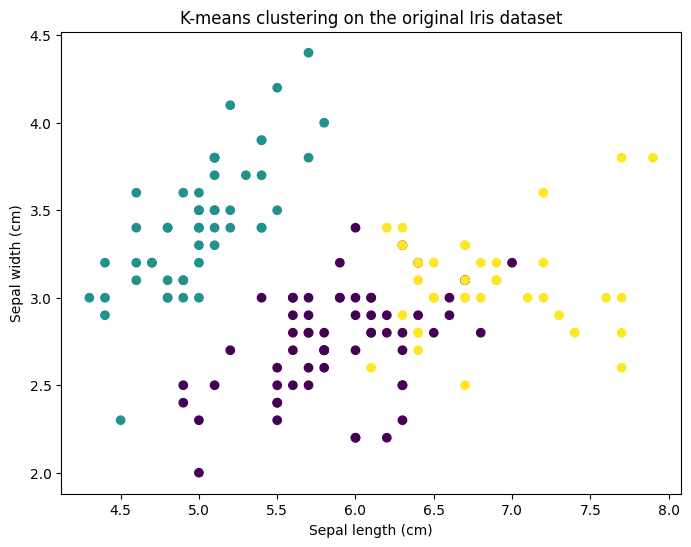

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred_original, cmap='viridis')
plt.title('K-means clustering on the original Iris dataset')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

In [27]:
pca = PCA()
pca.fit(X)

PCA()

In [28]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

In [29]:
for i, variance_ratio in enumerate(explained_variance_ratio):
    print(f"Component {i+1}: Explained Variance Ratio = {variance_ratio:.4f}, Cumulative Variance Ratio = {cumulative_variance_ratio[i]:.4f}")

Component 1: Explained Variance Ratio = 0.9246, Cumulative Variance Ratio = 0.9246
Component 2: Explained Variance Ratio = 0.0531, Cumulative Variance Ratio = 0.9777
Component 3: Explained Variance Ratio = 0.0171, Cumulative Variance Ratio = 0.9948
Component 4: Explained Variance Ratio = 0.0052, Cumulative Variance Ratio = 1.0000


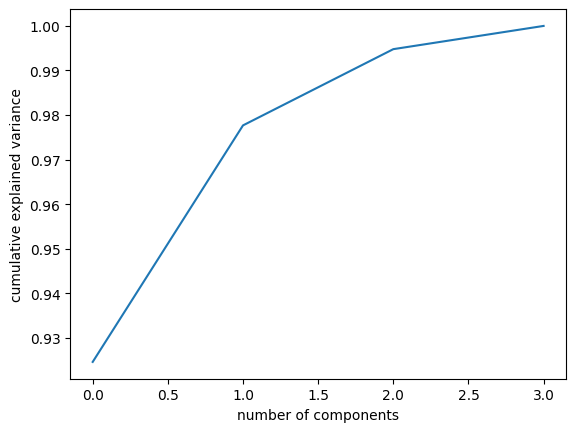

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [31]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [32]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred_reduced = kmeans.fit_predict(X_reduced)  

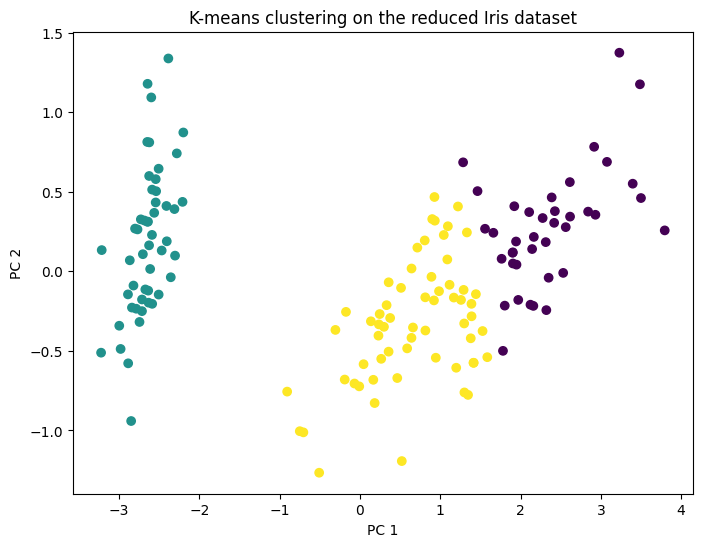

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred_reduced, cmap='viridis')
plt.title('K-means clustering on the reduced Iris dataset')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [37]:
# Variance ratio of the principal components
variance_ratio = pca.explained_variance_ratio_
print("Variance ratio of PC 1:", variance_ratio[0])
print("Variance ratio of PC 2:", variance_rtio[1])

Variance ratio of PC 1: 0.924618723201727
Variance ratio of PC 2: 0.05306648311706785
